In [28]:
import cv2
import pandas as pd
import numpy as np
import imutils
from imutils import perspective
from imutils import contours
from imageProcessing import resizeImg, generateMask

%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("../inputs/datasets/body_recognition.csv")

In [30]:
df

,names,urls,paths,GT
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK
...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO


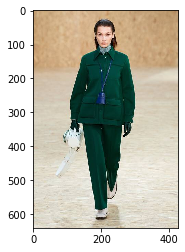

In [31]:
img = cv2.imread("../inputs/images/People_Yes_resized_640/OK_000000.jpg") 
# Reorganize numpy array for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

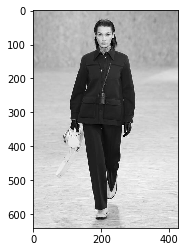

In [32]:
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_bw,cmap="gray")

In [33]:
img_bw.shape

(640, 427)

In [72]:
def getImgBW(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     # Generate a mask
    mask = generateMask(img)
    background_mask = np.all(mask == [0, 0, 0], axis=-1)
    
    #imarr = np.array(img)
    # Apply Mask / Separate Foreground and Background 
    foreground = np.array(img)
    foreground[background_mask] = [0,0,0]

    #plt.figure(figsize=(8,14))
    #plt.subplot(1,3,1)
    #plt.imshow(foreground,cmap="gray")
    
    img_bw = cv2.cvtColor(foreground, cv2.COLOR_RGB2GRAY)
    print(f"{path}- Done")
    
    return img_bw

In [73]:
img_bw_test = getImgBW("../inputs/images/People_Yes_resized_640/OK_000011.jpg")

../inputs/images/People_Yes_resized_640/OK_000011.jpg- Done


In [74]:
print(img_bw_test.shape)
print(img_bw_test)

(640, 427)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
df["img_bw"]=df.paths.apply(lambda x: getImgBW(x))
df

../inputs/images/People_Yes_resized_640/OK_000511.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000277.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000263.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000505.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000539.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000288.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000075.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000061.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000049.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000101.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000115.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000129.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000465.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000303.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000317.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000471.jpg- Done
../inputs/images/People_Yes_resized_640/

../inputs/images/People_Yes_resized_640/OK_000016.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000002.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000162.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000176.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000189.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000360.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000406.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000412.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000374.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000348.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000349.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000413.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000375.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000361.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000407.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000188.jpg- Done
../inputs/images/People_Yes_resized_640/

../inputs/images/People_Yes_resized_640/OK_000194.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000341.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000427.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000433.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000355.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000369.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000382.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000396.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000397.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000383.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000368.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000432.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000354.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000340.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000426.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000195.jpg- Done
../inputs/images/People_Yes_resized_640/

../inputs/images/People_Yes_resized_640/OK_000423.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000345.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000379.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000190.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000184.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000153.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000147.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000027.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000033.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000580.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000594.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000225.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000543.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000557.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000231.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000219.jpg- Done
../inputs/images/People_Yes_resized_640/

../inputs/images/People_Yes_resized_640/OK_000245.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000523.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000279.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000509.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000253.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000535.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000521.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000247.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000290.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000284.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000079.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000051.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000045.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000092.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000086.jpg- Done
../inputs/images/People_Yes_resized_640/OK_000119.jpg- Done
../inputs/images/People_Yes_resized_640/

../inputs/images/People_No/000000575243.jpg- Done
../inputs/images/People_No/000000570688.jpg- Done
../inputs/images/People_No/000000537270.jpg- Done
../inputs/images/People_No/000000552371.jpg- Done
../inputs/images/People_No/000000560880.jpg- Done
../inputs/images/People_No/000000556498.jpg- Done
../inputs/images/People_No/000000017627.jpg- Done
../inputs/images/People_No/000000579321.jpg- Done
../inputs/images/People_No/000000581317.jpg- Done
../inputs/images/People_No/000000017182.jpg- Done
../inputs/images/People_No/000000176232.jpg- Done
../inputs/images/People_No/000000138954.jpg- Done
../inputs/images/People_No/000000526751.jpg- Done
../inputs/images/People_No/000000552775.jpg- Done
../inputs/images/People_No/000000139684.jpg- Done
../inputs/images/People_No/000000530457.jpg- Done
../inputs/images/People_No/000000579902.jpg- Done
../inputs/images/People_No/000000553669.jpg- Done
../inputs/images/People_No/000000580418.jpg- Done
../inputs/images/People_No/000000548506.jpg- Done


../inputs/images/People_No/000000577149.jpg- Done
../inputs/images/People_No/000000563882.jpg- Done
../inputs/images/People_No/000000531134.jpg- Done
../inputs/images/People_No/000000525155.jpg- Done
../inputs/images/People_No/000000579158.jpg- Done
../inputs/images/People_No/000000140076.jpg- Done
../inputs/images/People_No/000000572555.jpg- Done
../inputs/images/People_No/000000563470.jpg- Done
../inputs/images/People_No/000000147725.jpg- Done
../inputs/images/People_No/000000559707.jpg- Done
../inputs/images/People_No/000000184791.jpg- Done
../inputs/images/People_No/000000567825.jpg- Done
../inputs/images/People_No/000000578093.jpg- Done
../inputs/images/People_No/000000575372.jpg- Done
../inputs/images/People_No/000000017714.jpg- Done
../inputs/images/People_No/000000544811.jpg- Done
../inputs/images/People_No/000000565607.jpg- Done
../inputs/images/People_No/000000564280.jpg- Done
../inputs/images/People_No/000000578871.jpg- Done
../inputs/images/People_No/000000562197.jpg- Done


../inputs/images/People_No/000000550797.jpg- Done
../inputs/images/People_No/000000581482.jpg- Done
../inputs/images/People_No/000000551304.jpg- Done
../inputs/images/People_No/000000528980.jpg- Done
../inputs/images/People_No/000000523194.jpg- Done
../inputs/images/People_No/000000534601.jpg- Done
../inputs/images/People_No/000000529122.jpg- Done
../inputs/images/People_No/000000184321.jpg- Done
../inputs/images/People_No/000000017207.jpg- Done
../inputs/images/People_No/000000535523.jpg- Done
../inputs/images/People_No/000000549167.jpg- Done
../inputs/images/People_No/000000176606.jpg- Done
../inputs/images/People_No/000000559348.jpg- Done
../inputs/images/People_No/000000568195.jpg- Done
../inputs/images/People_No/000000545007.jpg- Done
../inputs/images/People_No/000000534827.jpg- Done
../inputs/images/People_No/000000553664.jpg- Done
../inputs/images/People_No/000000560279.jpg- Done
../inputs/images/People_No/000000531036.jpg- Done
../inputs/images/People_No/000000521231.jpg- Done


,names,urls,paths,GT,img_bw
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [423]:
df.to_csv("../inputs/datasets/df_test.csv")

In [424]:
df.drop(feats)

,names,urls,paths,GT,img_bw,feats
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.389164240720217, 5.416353967221978, 4.64782..."
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.909390569598266, 5.620573314418322, 5.89417..."
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.691048212160912, 6.069115163055658, 5.49732..."
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.500595035294049, 5.735085139528259, 5.48621..."
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.930679650875621, 5.884087692194141, 5.91513..."
...,...,...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.5765627770550426, 5.745101665925906, 5.6077..."
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.090266675944826, 4.572623697951163, 4.95653..."
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.493859825901146, 5.472522682698679, 5.47613..."
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.045080967860434, 3.632671225553437, 3.62068..."


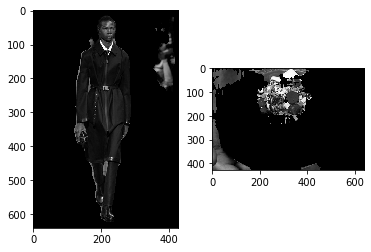

In [78]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(df.loc[0,'img_bw'],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(df.loc[1077,'img_bw'],cmap="gray")

In [79]:
from scipy.fftpack import dct

In [328]:
numfeats = 65
def getFeats(img):
    try:
        fft = np.log10(np.abs(np.fft.fft2(img)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(img)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None

In [330]:
feats = getFeats(img_bw)
print(feats)
print(feats.shape)

[5.51190973 5.65786955 5.85338344 ... 3.82972117 3.88715277 3.51811468]
(4225,)


In [332]:
df["feats"]=df.img_bw.apply(lambda x: getFeats(x))

In [334]:
df

,names,urls,paths,GT,img_bw,feats
0,OK_000000,https://assets.vogue.com/photos/5e5e9a3cc66797...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.389164240720217, 5.416353967221978, 4.64782..."
1,OK_000001,https://assets.vogue.com/photos/5e5e99ef02f19a...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.909390569598266, 5.620573314418322, 5.89417..."
2,OK_000002,https://assets.vogue.com/photos/5e5e9a61b8b636...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.691048212160912, 6.069115163055658, 5.49732..."
3,OK_000003,https://assets.vogue.com/photos/5e5e9a1ea173d7...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.500595035294049, 5.735085139528259, 5.48621..."
4,OK_000004,https://assets.vogue.com/photos/5e5e99f36dd294...,../inputs/images/People_Yes_resized_640/OK_000...,OK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.930679650875621, 5.884087692194141, 5.91513..."
...,...,...,...,...,...,...
1160,KO_000565,COCO_Dataset,../inputs/images/People_No/000000523782.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.5765627770550426, 5.745101665925906, 5.6077..."
1161,KO_000566,COCO_Dataset,../inputs/images/People_No/000000545407.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.090266675944826, 4.572623697951163, 4.95653..."
1162,KO_000567,COCO_Dataset,../inputs/images/People_No/000000578792.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.493859825901146, 5.472522682698679, 5.47613..."
1163,KO_000568,COCO_Dataset,../inputs/images/People_No/000000523033.jpg,KO,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.045080967860434, 3.632671225553437, 3.62068..."


In [336]:
df["feats"].isnull().value_counts()

False    1164
Name: feats, dtype: int64

In [338]:
df = df[~df["feats"].isnull()]

In [339]:
X = df.feats
y = df.GT

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [343]:
from scipy.spatial.distance import cosine

def getPrediction(vect):
    try:
        diffs = X_train.apply(lambda x: cosine(x,vect))
        #print(diffs)
        #print("---------")
        predictIndex = diffs.sort_values(ascending=True).index[0]
        #print(predictIndex)
        #print("---------")
        gt = df.iloc[predictIndex].GT
        #print(gt)
        #print("---------")
        return gt
    except:
        return "Cannot recognize"

In [345]:
df.iloc[0].GT

'OK'

In [347]:
getPrediction(df.loc[1,'feats'])

'OK'

In [349]:
res1 = pd.DataFrame({
    "GT":y_test,
    "prediction": X_test.apply(lambda x: getPrediction(x))
})

In [351]:
res1 = res1.reset_index()
res1

,index,GT,prediction
0,800,KO,KO
1,1047,KO,KO
2,1060,KO,OK
3,718,KO,KO
4,64,OK,KO
...,...,...,...
228,712,KO,KO
229,9,OK,KO
230,852,KO,KO
231,368,OK,KO


In [353]:
res=[]
for ind in range(len(res1.GT)):
    if res1.loc[ind,'GT'] == res1.loc[ind,'prediction']:
        res.append("ACIERTA")
    else:
        res.append("NO ACIERTA")
        
res1["res"]=res

In [355]:
aciertos = res1.res[res1.res == "ACIERTA"].value_counts()

In [357]:
ind_acierto = aciertos/len(res1.res)

In [359]:
ind_acierto

ACIERTA    0.403433
Name: res, dtype: float64

In [397]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

#histgrad_model = HistGradientBoostingClassifier(learning_rate=0.8, max_depth=50, min_samples_leaf=100) 0.8612
histgrad_model = HistGradientBoostingClassifier(learning_rate=0.8, max_depth=50, min_samples_leaf=260)

XX = np.vstack(X_train)
print(XX.shape)
histgrad_model.fit(XX, y_train)

XXT = np.vstack(X_test)
print(XXT.shape)
y_pred = histgrad_model.predict(XXT)

(931, 4225)
(233, 4225)


In [410]:
res_2 = pd.DataFrame({
    "GT":y_test,
    "prediction":y_pred
})

res_2 = res_2.reset_index()

res2=[]
for ind in range(len(res_2.GT)):
    if res_2.loc[ind,'GT'] == res_2.loc[ind,'prediction']:
        res2.append("ACIERTA")
    else:
        res2.append("NO ACIERTA")
        
res_2["res"]=res2

res_2

,index,GT,prediction,res
0,255,OK,OK,ACIERTA
1,890,KO,KO,ACIERTA
2,941,KO,OK,NO ACIERTA
3,641,KO,OK,NO ACIERTA
4,15,OK,KO,NO ACIERTA
...,...,...,...,...
228,673,KO,KO,ACIERTA
229,1106,KO,OK,NO ACIERTA
230,1016,KO,KO,ACIERTA
231,3,OK,OK,ACIERTA


In [411]:
aciertos = res_2.res[res_2.res == "ACIERTA"].value_counts()
ind_acierto = aciertos/len(res_2.res)
print(ind_acierto)

if ind_acierto[0] > 0.841202:
    print ("BEST!")

ACIERTA    0.7897
Name: res, dtype: float64


In [412]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

def checkPicture(path):
    img = cv2.imread(path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Generate a mask
    mask = generateMask(img)
    background_mask = np.all(mask == [0, 0, 0], axis=-1)

    imarr = np.array(img)
    # Apply Mask / Separate Foreground and Background 
    foreground = imarr.copy()
    foreground[background_mask] = [0,0,0]
    plt.figure(figsize=(8,14))
    plt.subplot(1,3,1)
    plt.imshow(foreground,cmap="gray")
    
    img_bw = cv2.cvtColor(foreground, cv2.COLOR_RGB2GRAY)
    img_bw = cv2.GaussianBlur(img_bw, (7, 7), 1)
    
    edged = cv2.Canny(img_bw, 50, 100)
    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)
    plt.subplot(1,3,2)
    plt.imshow(edged,cmap="gray")
    
    
    # find contours in the edge map
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    # sort the contours from left-to-right and initialize the
    # 'pixels per metric' calibration variable
    (cnts, _) = contours.sort_contours(cnts)
    lst=[]
    for ind,c in enumerate(cnts):
        lst.append([ind,cv2.contourArea(c)])
    lst.sort(key=lambda lst: lst[1], reverse=True)
    c = cnts[lst[0][0]]
    
    # compute the rotated bounding box of the contour
    orig = img.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding box

    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
    
    
    # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    # draw the midpoints on the image
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

    # draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
    plt.subplot(1,3,3)
    plt.imshow(orig)
    
    print("Esta foto está:",histgrad_model.predict([getFeats(img_bw)]))
    

Esta foto está: ['OK']


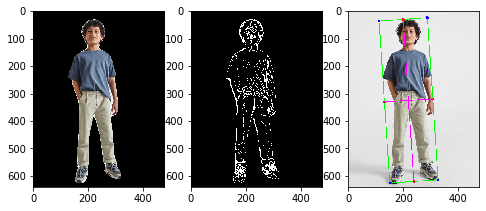

In [413]:
checkPicture("../inputs/images/Posture_Yes/modelo3.jpg")

Esta foto está: ['KO']


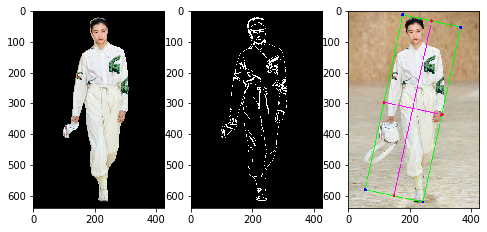

In [414]:
checkPicture("../inputs/images/People_Yes_resized_640/OK_000008.jpg")

Esta foto está: ['OK']


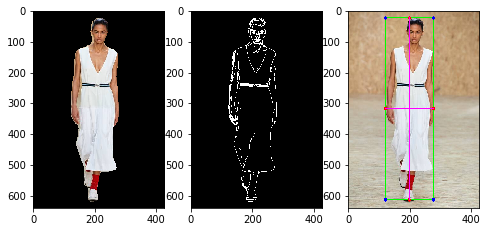

In [415]:
checkPicture("../inputs/images/People_Yes_resized_640/OK_000009.jpg")

Esta foto está: ['OK']


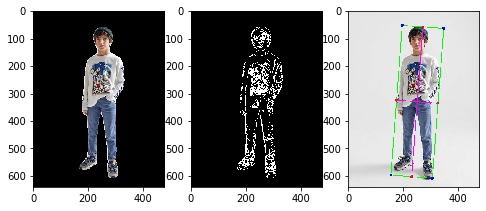

In [416]:
checkPicture("../inputs/images/Posture_Yes/modelo2.jpg")

Esta foto está: ['OK']


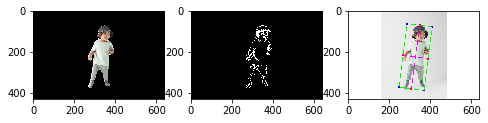

In [417]:
checkPicture("../inputs/images/Posture_Yes/modelo23.jpg")

Esta foto está: ['OK']


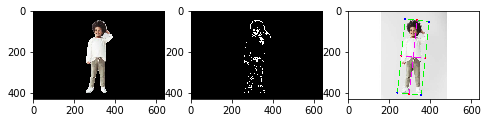

In [418]:
checkPicture("../inputs/images/Posture_Yes/modelo22.jpg")

Esta foto está: ['OK']


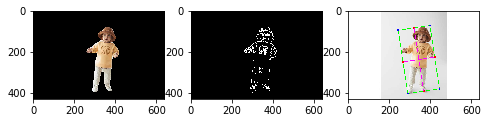

In [419]:
checkPicture("../inputs/images/Posture_Yes/modelo21.jpg")

Esta foto está: ['KO']


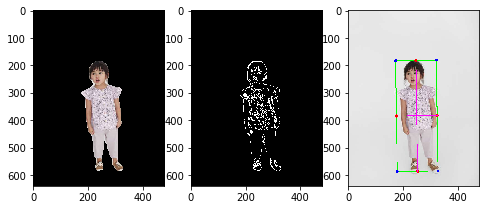

In [420]:
checkPicture("../inputs/images/Posture_Yes/modelo18.jpg")

Esta foto está: ['OK']


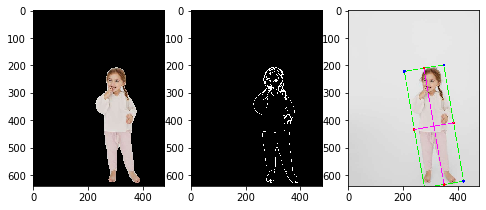

In [421]:
checkPicture("../inputs/images/Posture_Yes/modelo17.jpg")

Esta foto está: ['KO']


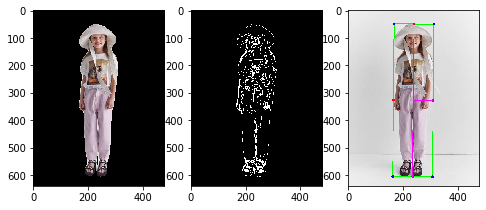

In [422]:
checkPicture("../inputs/images/Posture_Yes/modelo13.jpg")